In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import tools untuk Imputasi (Pengisian Missing Values)
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time

In [5]:
# LOAD DATASET

file_path = "/home/salwa/Downloads/one_million_mushrooms.csv"
start_time = time.time()

print("MEMUAT DATASET...")

try:
    df = pd.read_csv(file_path, sep=';')
    df = df[df['class'] != 'class']

    for col in ['cap-diameter', 'stem-height', 'stem-width']:
        df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')

    df['class'] = df['class'].replace({'p': 1, 'e': 0}).astype('int8')
    
    print(f"Dataset berhasil dimuat. Total baris: {len(df)}")
except Exception as e:
    print(f"ERROR: Gagal memuat dataset penuh. ({e})")
    raise

MEMUAT DATASET...
Dataset berhasil dimuat. Total baris: 1038000


/tmp/ipykernel_20912/217007506.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'p': 1, 'e': 0}).astype('int8')


In [6]:
# Mengecek Duplikasi
print("\nJumlah Duplikasi")
# Menghitung jumlah baris yang merupakan duplikat sempurna dari baris sebelumnya
duplicates_count = df.duplicated().sum()
print(f"Total baris duplikat yang ditemukan: {duplicates_count}")


Jumlah Duplikasi
Total baris duplikat yang ditemukan: 11621


In [7]:
print("\nDATA PREPROCESSING (Pembersihan dan Pembagian Data)...")

# Penanganan Duplikat
df.drop_duplicates(inplace=True)
print(f"  - Baris duplikat dihapus.")

# Penghapusan Kolom Tidak Relevan
df.drop(columns=['veil-type'], inplace=True)
print("  - Kolom 'veil-type' dihapus (varians nol).")

# Target dan Fitur
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"  - Ukuran data latih: {len(X_train)} | Ukuran data uji: {len(X_test)}")


DATA PREPROCESSING (Pembersihan dan Pembagian Data)...
  - Baris duplikat dihapus.
  - Kolom 'veil-type' dihapus (varians nol).
  - Ukuran data latih: 821103 | Ukuran data uji: 205276


In [8]:
# Mengecek Duplikasi
print("\n--- 1. Jumlah Duplikasi ---")
# Menghitung jumlah baris yang merupakan duplikat sempurna dari baris sebelumnya
duplicates_count = df.duplicated().sum()
print(f"Total baris duplikat yang ditemukan: {duplicates_count}")

# Mengecek Missing Values (Nilai Kosong)
print("\n--- 2. Jumlah Missing Values per Kolom ---")
# Menghitung jumlah nilai 'NaN' (Not a Number) atau nilai kosong
missing_values_count = df.isnull().sum()

# Filter dan tampilkan hanya kolom yang memiliki missing value
missing_data_summary = missing_values_count[missing_values_count > 0].sort_values(ascending=False)

if missing_data_summary.empty:
    print("Tidak ada missing values (NaN) yang ditemukan.")
else:
    print(missing_data_summary)

print("\nRingkasan Data Awal")
print(df.info())


--- 1. Jumlah Duplikasi ---
Total baris duplikat yang ditemukan: 0

--- 2. Jumlah Missing Values per Kolom ---
spore-print-color    922035
veil-color           900380
stem-root            875809
stem-surface         647874
gill-spacing         425863
cap-surface          239950
gill-attachment      164293
ring-type             42000
dtype: int64

Ringkasan Data Awal
<class 'pandas.core.frame.DataFrame'>
Index: 1026379 entries, 0 to 1037999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1026379 non-null  int8   
 1   cap-diameter          1026379 non-null  float32
 2   cap-shape             1026379 non-null  object 
 3   cap-surface           786429 non-null   object 
 4   cap-color             1026379 non-null  object 
 5   does-bruise-or-bleed  1026379 non-null  object 
 6   gill-attachment       862086 non-null   object 
 7   gill-spacing          600516 non-null   

In [13]:
# NORMALISASI DAN PENANGANAN MISSING VALUES--

print("\nNORMALISASI & PENANGANAN MISSING VALUES DENGAN PIPELINE...")

numerical_features = ['cap-diameter', 'stem-height', 'stem-width']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Transformer untuk data numerik: Imputasi (Median) -> Normalisasi (StandardScaler)
numerical_transformer = Pipeline(steps=[
    # PENGISIAN MISSING VALUE NUMERIK
    ('imputer', SimpleImputer(strategy='median')), 
    # NORMALISASI (Standardisasi)
    ('scaler', StandardScaler()) 
])

# Transformer untuk data kategorikal: Imputasi (Modus) -> Encoding
categorical_transformer = Pipeline(steps=[
    # PENGISIAN MISSING VALUE KATEGORICAL
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan semua transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' 
)

print("Pipeline Imputasi Missing Values dan Normalisasi berhasil dibuat.")


NORMALISASI & PENANGANAN MISSING VALUES DENGAN PIPELINE...
Pipeline Imputasi Missing Values dan Normalisasi berhasil dibuat.


In [14]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer 

print("\nVERIFIKASI SUPER SIMPEL: CEK MISSING VALUE")

# Karena kita hanya ingin memastikan NaN diisi, kita tidak perlu OneHotEncoder di sini.
imputer_only = SimpleImputer(strategy='most_frequent')

# Terapkan (Fit dan Transform) Imputer ke data latih KATEGORIKAL
# Ini akan menghitung Modus dari X_train dan mengisi semua NaN.
print("Melakukan fit_transform SimpleImputer pada data latih kategorikal...")
X_cat_imputed = imputer_only.fit_transform(X_train[categorical_features])

# X_cat_imputed sekarang adalah array NumPy yang berisi string.
# Missing Values (NaN) yang semula berupa numpy.nan kini sudah diisi string (modus).

# Hitung Missing Values (NaN) yang tersisa
# Kita perlu mengecek apakah ada nilai 'NaN' (numpy.nan) di array string ini.
nan_count_cat = np.vectorize(lambda x: pd.isna(x) if isinstance(x, str) else np.isnan(x))(X_cat_imputed).sum()

# 4. Cek Hasil
if nan_count_cat == 0:
    print(f"\nHASIL SIMPEL: Jumlah Missing Values (NaN) pada Fitur Kategorikal setelah Imputasi: {nan_count_cat}")
    print("   Semua Missing Values pada kolom kategorikal (Modus Imputer) SUDAH BERHASIL diisi.")
else:
    print(f"\nHASIL SIMPEL: Terdapat {nan_count_cat} Missing Values (NaN) tersisa pada fitur kategorikal.")
    print("   Ada masalah pada Imputasi SimpleImputer.")


VERIFIKASI SUPER SIMPEL: CEK MISSING VALUE
Melakukan fit_transform SimpleImputer pada data latih kategorikal...

HASIL SIMPEL: Jumlah Missing Values (NaN) pada Fitur Kategorikal setelah Imputasi: 0
   Semua Missing Values pada kolom kategorikal (Modus Imputer) SUDAH BERHASIL diisi.



VISUALISASI DATA (3 Grafik Sederhana)...


/tmp/ipykernel_20912/2120699131.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


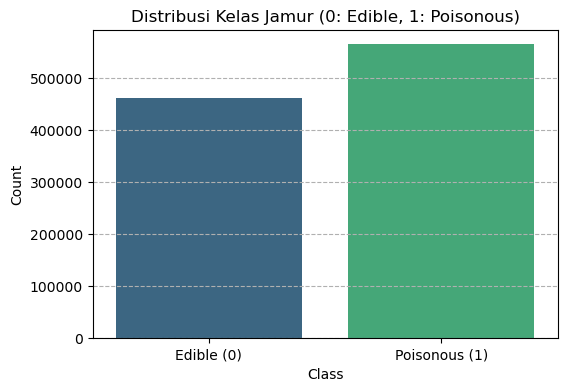

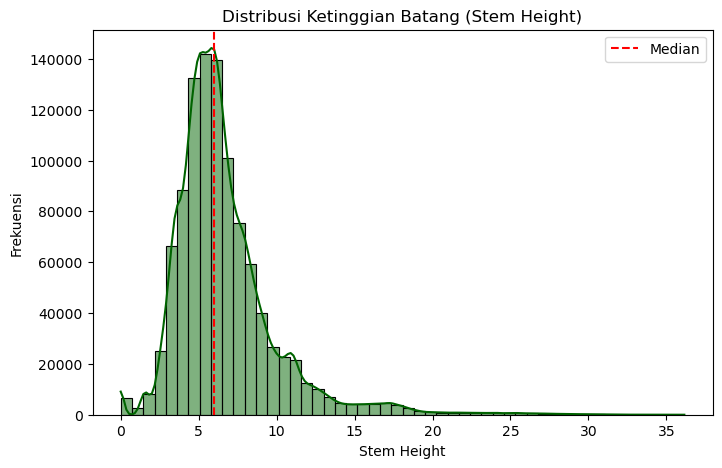

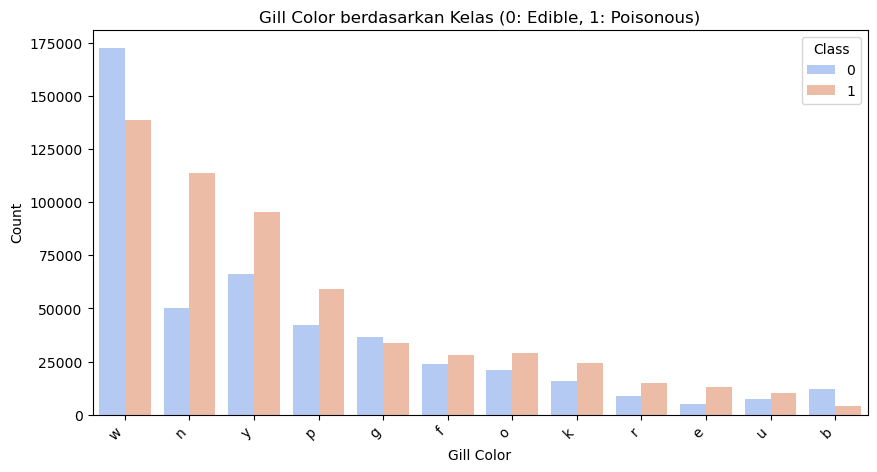

In [15]:
#VISUALISASI DATA

print("\nVISUALISASI DATA (3 Grafik Sederhana)...")

# 4.1 Distribusi Kelas Target
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title('Distribusi Kelas Jamur (0: Edible, 1: Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible (0)', 'Poisonous (1)'])
plt.grid(axis='y', linestyle='--')
plt.show()

# 4.2 Distribusi Fitur Numerik Utama (Stem Height)
plt.figure(figsize=(8, 5))
sns.histplot(df['stem-height'].dropna(), kde=True, bins=50, color='darkgreen')
plt.title('Distribusi Ketinggian Batang (Stem Height)')
plt.xlabel('Stem Height')
plt.ylabel('Frekuensi')
plt.axvline(df['stem-height'].median(), color='red', linestyle='--', label='Median')
plt.legend()
plt.show()

# 4.3 Hubungan Fitur Kategorikal (Gill Color) dengan Kelas Target
plt.figure(figsize=(10, 5))
temp_df = df.copy()
# Mengisi NaN untuk visualisasi agar label 'Missing' muncul
temp_df['gill-color'] = temp_df['gill-color'].fillna('Missing') 
sns.countplot(data=temp_df, x='gill-color', hue='class', palette='coolwarm', 
              order=temp_df['gill-color'].value_counts().index)
plt.title('Gill Color berdasarkan Kelas (0: Edible, 1: Poisonous)')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Class')
plt.show()

In [16]:
# klasifikasi (ML)

print("\nMODEL KLASIFIKASI REGRESI LOGISTIK...")

# Menggabungkan preprocessor (termasuk Imputer) dan model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='saga', random_state=42, max_iter=200, n_jobs=-1))
])

print("Mulai Melatih Model pada data penuh...")

training_start_time = time.time()
# Pelatihan model: Semua langkah preprocessing (Imputasi, Normalisasi, Encoding)
# dilakukan secara otomatis di sini sebelum training
model_pipeline.fit(X_train, y_train) 
training_duration = time.time() - training_start_time

print(f"Pelatihan model selesai dalam waktu: {training_duration:.2f} detik.")

# Prediksi pada data uji
y_pred = model_pipeline.predict(X_test)


MODEL KLASIFIKASI REGRESI LOGISTIK...
Mulai Melatih Model pada data penuh...
Pelatihan model selesai dalam waktu: 171.58 detik.



OUTPUT ANALISIS: EVALUASI MODEL KLASIFIKASI
Akurasi Model: 0.8417


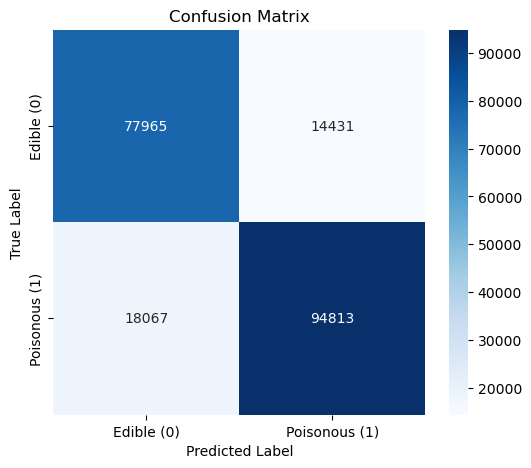

In [17]:
# OUTPUT ANALISIS: EVALUASI METRIK (Tugas 5)

print("\nOUTPUT ANALISIS: EVALUASI MODEL KLASIFIKASI")

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible (0)', 'Poisonous (1)'], 
            yticklabels=['Edible (0)', 'Poisonous (1)'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [19]:
# Laporan Klasifikasi Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Edible (0)', 'Poisonous (1)']))

total_duration = time.time() - start_time
print(f"\nSEMUA TUGAS SELESAI")
print(f"Total Waktu Eksekusi: {total_duration:.2f} detik.")


Classification Report:
               precision    recall  f1-score   support

   Edible (0)       0.81      0.84      0.83     92396
Poisonous (1)       0.87      0.84      0.85    112880

     accuracy                           0.84    205276
    macro avg       0.84      0.84      0.84    205276
 weighted avg       0.84      0.84      0.84    205276


SEMUA TUGAS SELESAI
Total Waktu Eksekusi: 2822.77 detik.
